# ATA Exercise

First, import the necessary libraries:

In [1]:
import json
import psycopg2
import pandas as pd

Load the configuration file and store the database settings in a dictionary object. The configuration file has the credentials for the database (this file is stored externally):

In [2]:
with open('config.json') as f:
    conf = json.load(f)

Create the connection string. Here, the "psycopg2" library is used to connect to a postgres database:

In [3]:
conn_str = "host={} dbname={} user={} password={}".format(conf["host"], conf["database"], conf["user"], conf["passw"])

try:
    conn = psycopg2.connect(conn_str)

except psycopg2.OperationalError as e:
    print("Unable to connect!\n{0}").format(e)

Basic query to store all rows from the passengers table into a pandas dataframe object. The connection is closed after querying the database:

In [4]:
df = pd.read_sql('SELECT * FROM passengers', con=conn)
conn.close()

Showing the output of the dataframe object:

In [5]:
df

,id,survived,pclass,name,sex,age,siblings_spouses,parents_children,fare
0,1,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.250000
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.283300
2,3,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.925000
3,4,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.100000
4,5,0,3,Mr. William Henry Allen,male,35.0,0,0,8.050000
5,6,0,3,Mr. James Moran,male,27.0,0,0,8.458300
6,7,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.862500
7,8,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.075000
8,9,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.133300
9,10,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.070800


We can store some relevant columns in a new dataframe object for further analysis as shown below:

In [6]:
df_new = df[['age','sex', 'survived']]
df_new.head()

,age,sex,survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


Based on the sample data, more people died (0) than survived (1). This is pretty obvious since it's a well known fact that the majority of passengers aboard the ship didn't survive:

In [7]:
df_new['survived'].value_counts()

0    1545
1    1342
Name: survived, dtype: int64

Some basic plots can also be created based on the sample data. For example, the plot below shows the age distribution from our dataset:

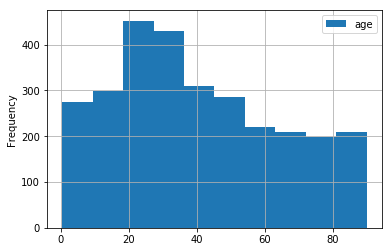

In [12]:
df_new.plot(y='age', kind='hist', grid=True);

We can also see a distribution of the passengers that survived or didn't survive based on their age:

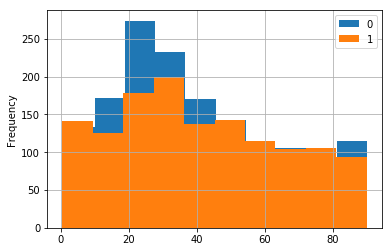

In [9]:
df_new.groupby('survived')['age'].plot(kind='hist', grid=True, legend=True);

This is better represented in the density plot shown below:

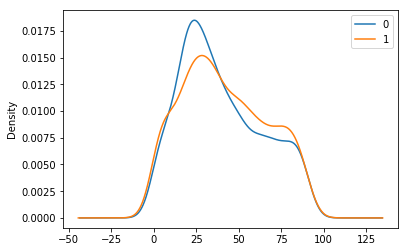

In [10]:
df_new.groupby('survived')['age'].plot(kind='kde', legend=True);